#  Analisi preliminari

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Read file excel

In [11]:
df = pd.read_csv('./dataset/diabetes_train.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64.822537,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59.912290,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67.853267,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57.985607,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70.278133,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19.354174,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70.000000,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60.000000,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27.000000,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


Count the number of missing values for each column

In [12]:
df.isnull().sum() # count the number of missing values for each column

gender                       0
age                          0
hypertension                 0
heart_disease                0
smoking_history              0
bmi                          0
HbA1c_level                  0
blood_glucose_level          0
Insulin_Sensitivity_Est    111
BMI_Glucose_Interaction      0
Random_Lab_Marker            0
diabetes                     0
dtype: int64

In [13]:
print(df.describe())
print(df.describe(include='object'))

              age  hypertension  heart_disease         bmi  HbA1c_level  \
count  588.000000    588.000000     588.000000  588.000000   588.000000   
mean    45.305054      0.078231       0.034014   28.361672     5.812900   
std     21.770802      0.268764       0.181418    7.098412     1.399697   
min     -0.618799      0.000000       0.000000   13.860000     1.826630   
25%     29.000000      0.000000       0.000000   25.169932     4.852182   
50%     50.000000      0.000000       0.000000   27.320000     6.000000   
75%     63.046163      0.000000       0.000000   30.940241     6.600000   
max     80.307029      1.000000       1.000000   95.690000     9.770172   

       blood_glucose_level  Insulin_Sensitivity_Est  BMI_Glucose_Interaction  \
count           588.000000               477.000000               588.000000   
mean            152.216394                 0.802415              4389.052443   
std              51.975885                 0.979681              2107.296008   
min 

In [18]:
# Frequenze colonne categoriali
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(df[col].value_counts().to_string())
    print()

# Frequenze colonne a dominio limitato
few_unique_cols = [col for col in df.columns if df[col].nunique() <= 5]

for col in few_unique_cols:
    print(df[col].value_counts().to_string())
    print()

gender
Male      295
Female    293

smoking_history
never          206
No Info        192
former          81
current         58
not current     32
ever            19

gender
Male      295
Female    293

hypertension
0    542
1     46

heart_disease
0    568
1     20

diabetes
0    441
1    147



In [21]:
# Crea una copia del dataset
df_encoded = df.copy()

# Applica LabelEncoder a tutte le colonne categoriche
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

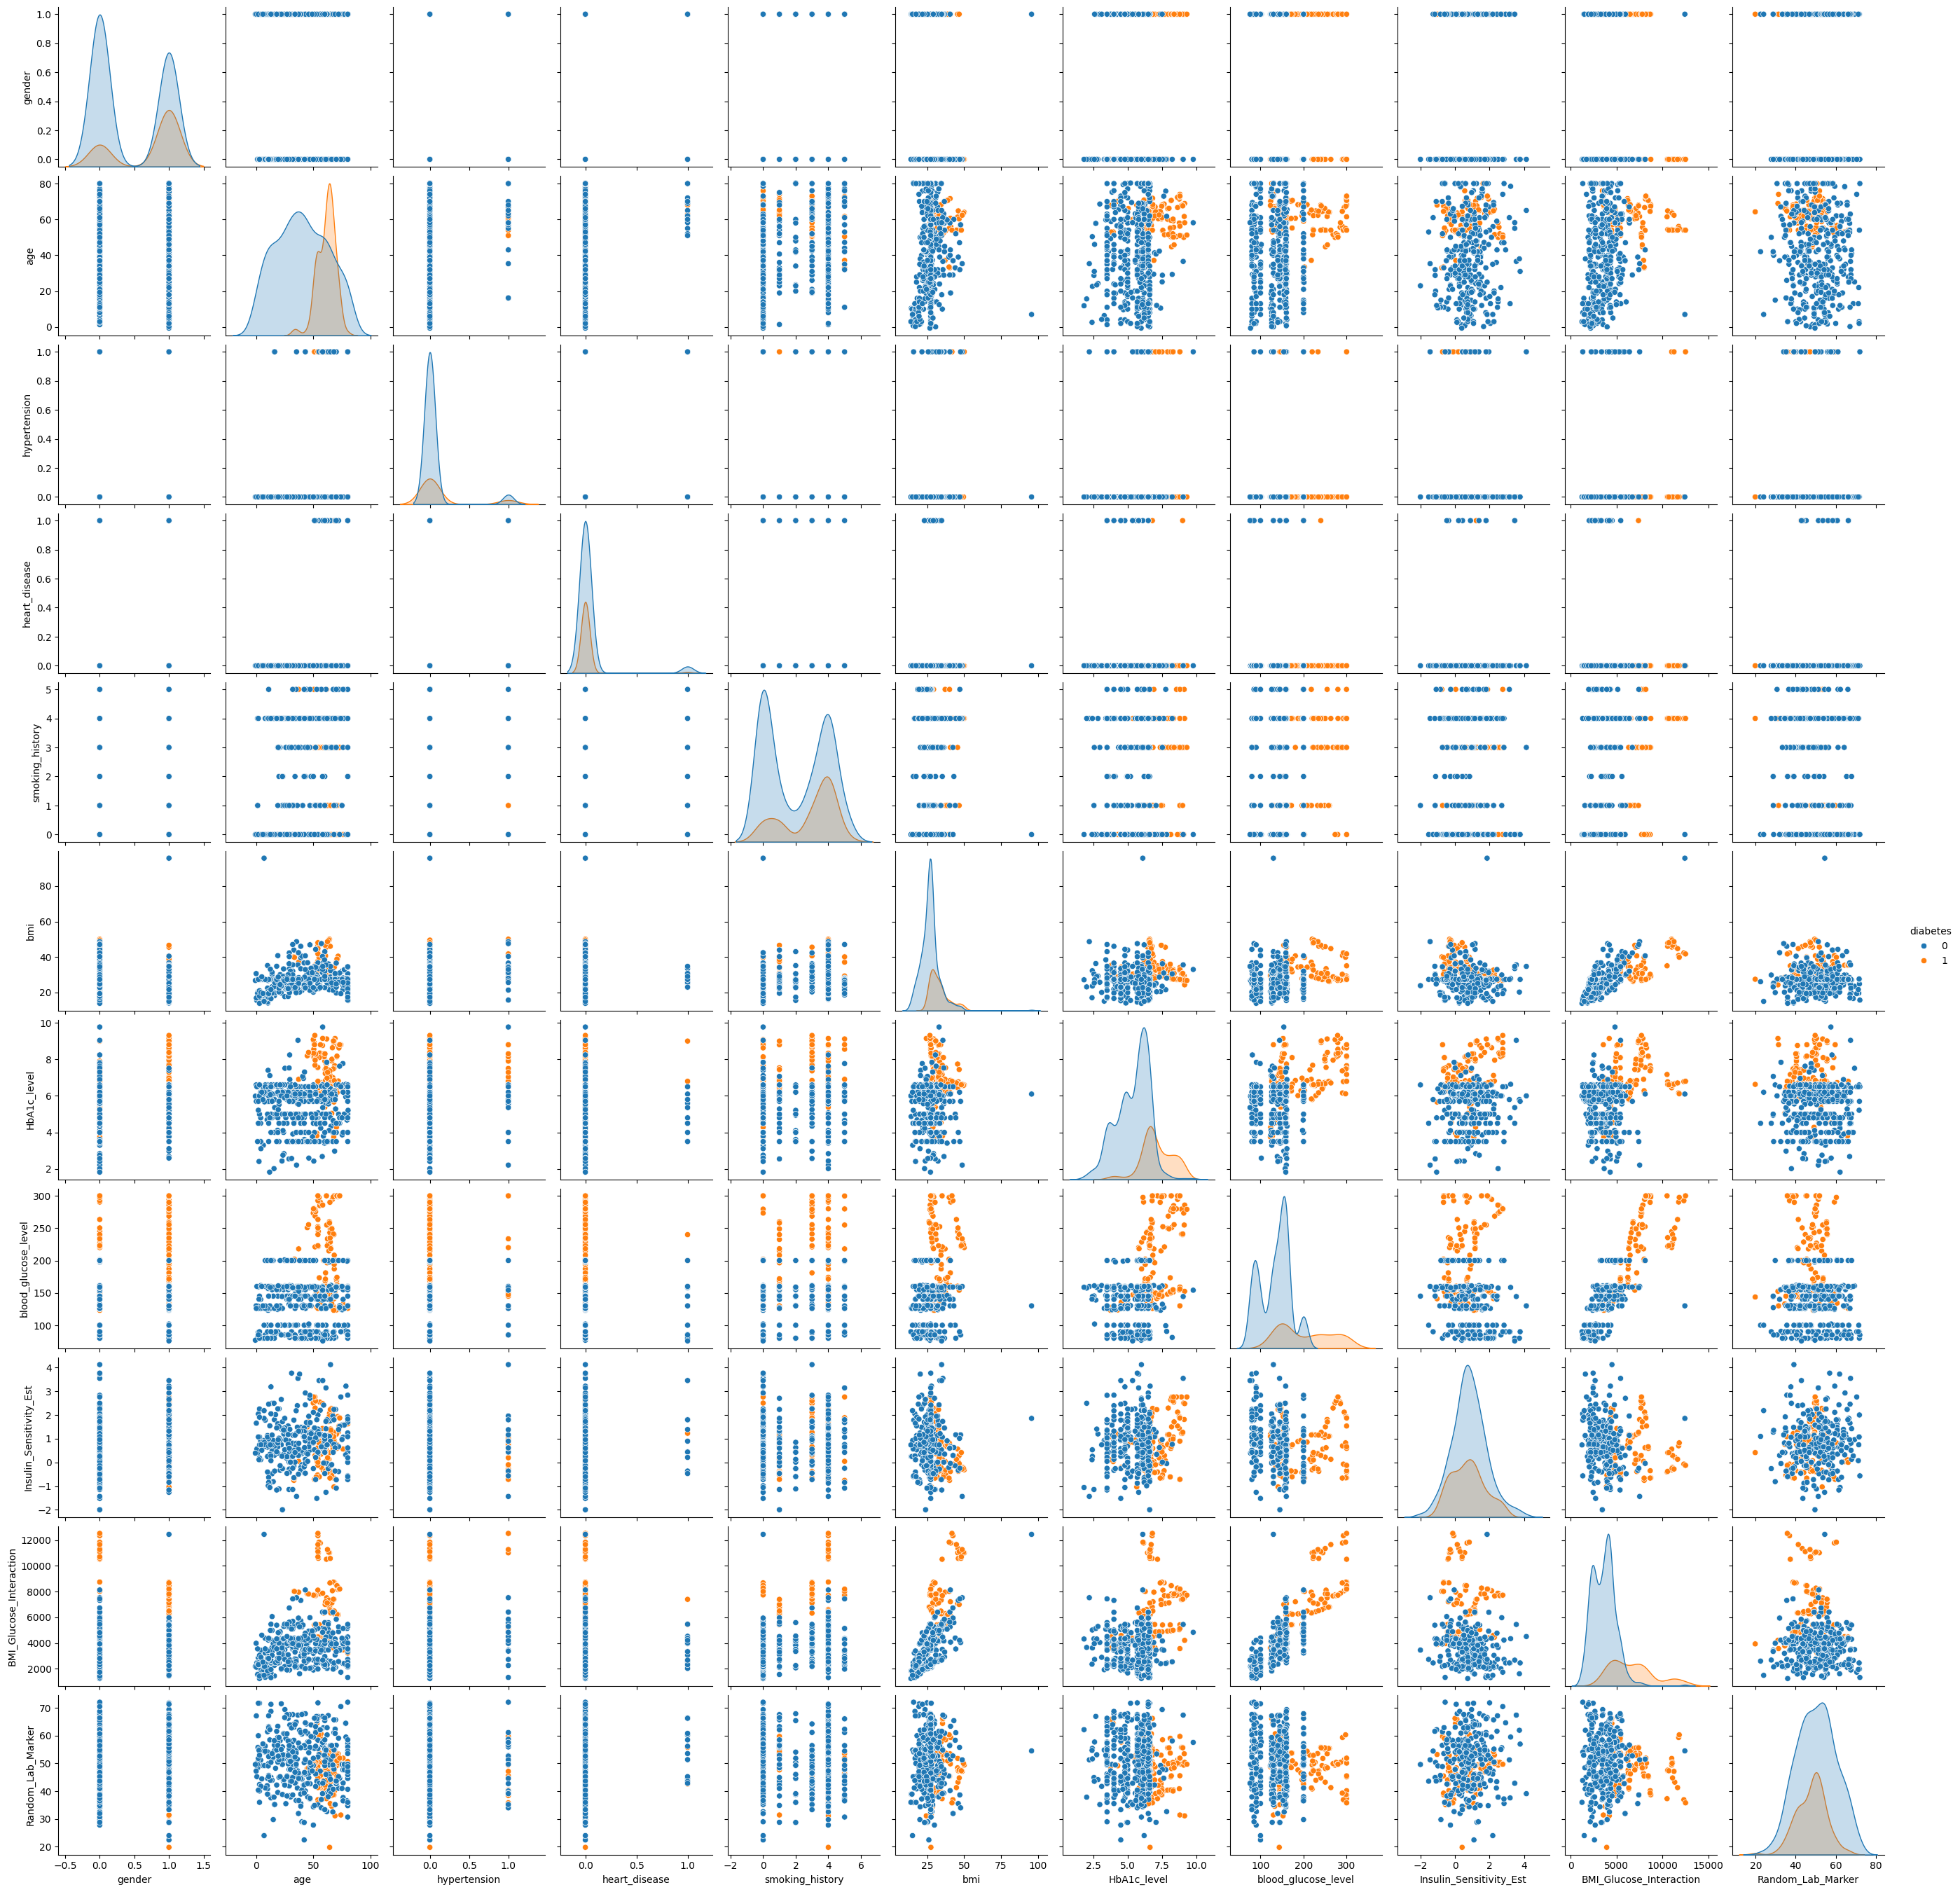

In [23]:
# Pair plot
sns.pairplot(df_encoded, hue = 'diabetes')
plt.show()